In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def explicit_solve1(a, b, g1, g2, T, fi, k, f, n, m):
    h = (b - a) / n
    tau = T / m
    vector_x = np.linspace(a, b, n + 1)
    vector_t = np.linspace(0, T, m + 1)
    matrix_u = np.zeros((m + 1, n + 1))

    for i in range(m + 1):
        matrix_u[i][0] = g1(vector_t[i])

    for i in range(n + 1):
        matrix_u[0][i] = fi(vector_x[i])
            
    for i in range(1, m + 1):
        for j in range(1, n):
            matrix_u[i][j] = (
                k * tau / (h ** 2) * (matrix_u[i - 1][j + 1] - 2 * matrix_u[i - 1][j] + matrix_u[i - 1][j - 1]) +
                tau * f(vector_x[j], vector_t[i - 1]) + matrix_u[i - 1][j]
            )
        matrix_u[i][n] = matrix_u[i][n - 1] + h * g2(vector_t[i])
    
    return matrix_u

In [22]:
def explicit_solve2(a, b, g1, g2, T, fi, k, f, n, m):
    h = (b - a) / n
    tau = T / m
    vector_x = np.linspace(a, b, n + 1)
    vector_t = np.linspace(0, T, m + 1)
    matrix_u = np.zeros((m + 1, n + 1))

    for i in range(m + 1):
        matrix_u[i][0] = g1(vector_t[i])

    for i in range(n + 1):
        matrix_u[0][i] = fi(vector_x[i])
            
    for i in range(1, m + 1):
        for j in range(1, n):
            matrix_u[i][j] = (
                k * tau / (h ** 2) * (matrix_u[i - 1][j + 1] - 2 * matrix_u[i - 1][j] + matrix_u[i - 1][j - 1]) +
                tau * f(vector_x[j], vector_t[i - 1]) + matrix_u[i - 1][j]
            )
        matrix_u[i][n] = (
            k * tau / h ** 2 * (matrix_u[i - 1][n - 1] - 2 * matrix_u[i - 1][n] + (2 * h * g2(vector_t[i - 1]) +
            matrix_u[i - 1][n - 1])) + tau * f(vector_x[j], vector_t[i - 1]) + matrix_u[i - 1][n]
        )
    return matrix_u

In [28]:
def implicit_solve1(a, b, g1, g2, T, fi, k, f, n, m):
    h = (b - a) / n
    tau = T / m
    vector_x = np.linspace(a, b, n + 1)
    vector_t = np.linspace(0, T, m + 1)
    matrix_u = np.zeros((m + 1, n + 1))

    for i in range(m + 1):
        matrix_u[i][0] = g1(vector_t[i])

    for i in range(n + 1):
        matrix_u[0][i] = fi(vector_x[i])

    for i in range(1, m + 1):
        A = np.zeros((n + 1, n + 1))
        b = np.zeros(n + 1)
        
        A[0][0] = A[n][n] = 1
        A[n][n - 1] = -1
        b[0] = matrix_u[i][0]
        b[n] = h * g2(vector_t[i])

        for j in range(1, n):
            A[j][j - 1] = -k / h ** 2
            A[j][j] = 2 * k / h ** 2 + 1 / tau
            A[j][j + 1] = -k / h ** 2
            b[j] = f(vector_x[j], vector_t[j]) + matrix_u[i - 1][j] / tau

        ans = np.linalg.solve(A, b)
        matrix_u[i][:] = ans[:]
    
    return matrix_u

In [34]:
def implicit_solve2(a, b, g1, g2, T, fi, k, f, n, m):
    h = (b - a) / n
    tau = T / m
    vector_x = np.linspace(a, b, n + 1)
    vector_t = np.linspace(0, T, m + 1)
    matrix_u = np.zeros((m + 1, n + 1))

    for i in range(m + 1):
        matrix_u[i][0] = g1(vector_t[i])

    for i in range(n + 1):
        matrix_u[0][i] = fi(vector_x[i])

    for i in range(1, m + 1):
        A = np.zeros((n + 1, n + 1))
        b = np.zeros(n + 1)
        
        A[0][0] = A[n][n] = 1
        A[n][n - 2] = -1
        b[0] = matrix_u[i][0]
        b[n] = h * g2(vector_t[i])

        for j in range(1, n):
            A[j][j - 1] = -k / h ** 2
            A[j][j] = 2 * k / h ** 2 + 1 / tau
            A[j][j + 1] = -k / h ** 2
            b[j] = f(vector_x[j], vector_t[j]) + matrix_u[i - 1][j] / tau

        ans = np.linalg.solve(A, b)
        matrix_u[i][:] = ans[:]
    
    return matrix_u

In [35]:
a, b = 0, 2
k = 0.5
T = 0.4

fi = lambda x: 1
g1 = lambda t: math.e ** (-t)
g2 = lambda t: math.e ** (-5 * t)
f = lambda x, t: 1

n = 10
h = (b - a) / n
tau = round(0.5 * (h ** 2) / k, 4)
m = int(T / tau)

vector_x = np.linspace(a, b, n + 1)
vector_t = np.linspace(0, T, m + 1)

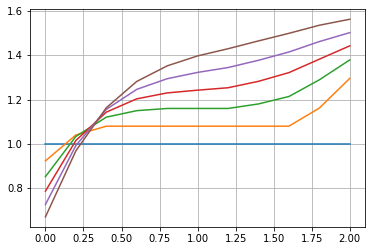

In [36]:
matrix_u = explicit_solve1(a, b, g1, g2, T, fi, k, f, n, m)
for i in range(0, len(vector_t), 2):
    plt.plot(vector_x, matrix_u[i])
plt.grid()
plt.show()

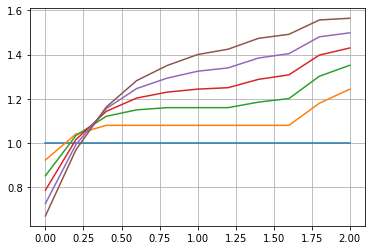

In [37]:
matrix_u = explicit_solve2(a, b, g1, g2, T, fi, k, f, n, m)
for i in range(0, len(vector_t), 2):
    plt.plot(vector_x, matrix_u[i])
plt.grid()
plt.show()

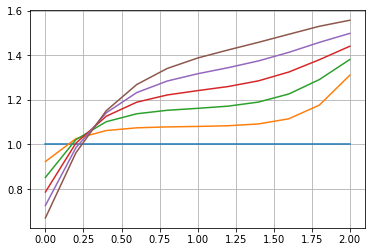

In [38]:
matrix_u = implicit_solve1(a, b, g1, g2, T, fi, k, f, n, m)
for i in range(0, len(vector_t), 2):
    plt.plot(vector_x, matrix_u[i])
plt.grid()
plt.show()

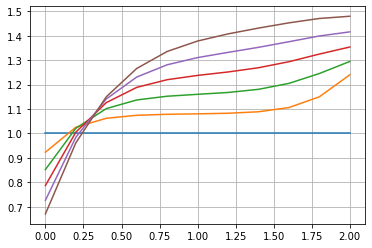

In [39]:
matrix_u = implicit_solve2(a, b, g1, g2, T, fi, k, f, n, m)
for i in range(0, len(vector_t), 2):
    plt.plot(vector_x, matrix_u[i])
plt.grid()
plt.show()